Sample data:
   Age  Attendance       GPA  Family_Support  Extra_Activities  Dropout
0   23   64.722445  2.233796               1                 1        1
1   20   69.254886  3.879664               0                 1        1
2   21   92.556834  3.255416               0                 1        1
3   23   65.846100  2.669811               1                 1        1
4   19   58.474637  2.278544               1                 0        0

Decision Tree Model Evaluation:
Accuracy: 0.65
Confusion Matrix:
 [[47 18]
 [17 18]]
Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.72      0.73        65
           1       0.50      0.51      0.51        35

    accuracy                           0.65       100
   macro avg       0.62      0.62      0.62       100
weighted avg       0.65      0.65      0.65       100



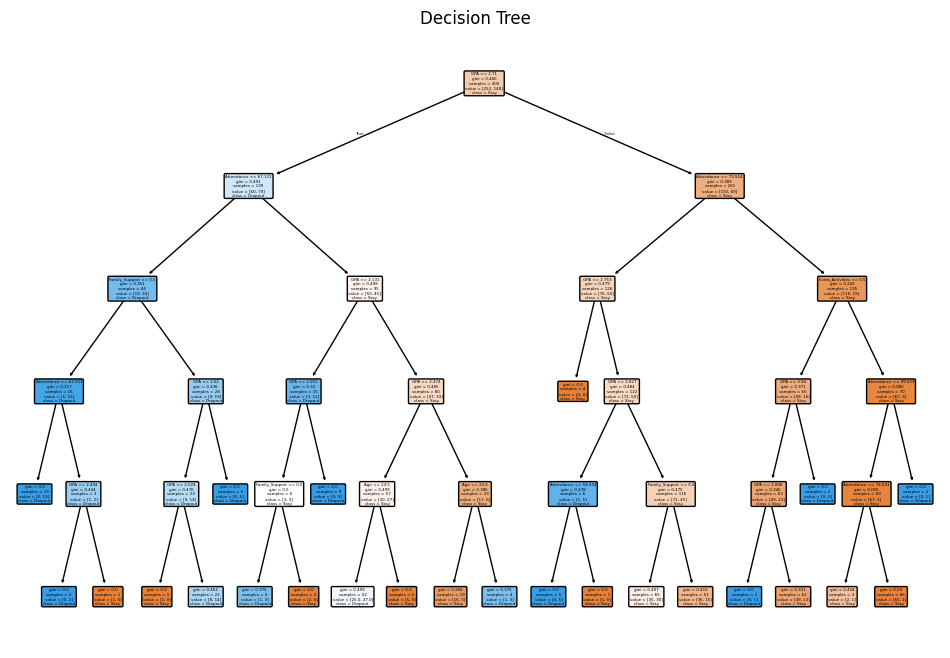


Random Forest Model Evaluation:
Accuracy: 0.72
Confusion Matrix:
 [[53 12]
 [16 19]]
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.82      0.79        65
           1       0.61      0.54      0.58        35

    accuracy                           0.72       100
   macro avg       0.69      0.68      0.68       100
weighted avg       0.71      0.72      0.72       100



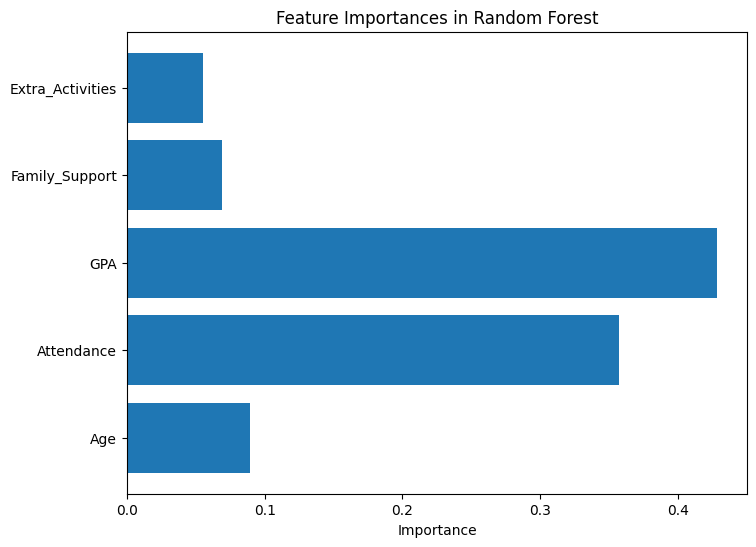

In [1]:
# Install required libraries
!pip install scikit-learn
!pip install matplotlib

# Import libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt

# Generate sample dataset (for demonstration)
np.random.seed(42)
num_samples = 500

# Features: age, attendance rate, GPA, family support, extra activities
age = np.random.randint(17, 25, num_samples)
attendance = np.random.uniform(50, 100, num_samples)
gpa = np.random.uniform(2.0, 4.0, num_samples)
family_support = np.random.randint(0, 2, num_samples)  # 0 = no, 1 = yes
extra_activities = np.random.randint(0, 2, num_samples)  # 0 = no, 1 = yes

# Generate dropout label (0 = stayed, 1 = dropout)
# Example logic: lower attendance, lower GPA, no support → higher dropout chance
dropout = []
for i in range(num_samples):
    prob = 0
    if attendance[i] < 75:
        prob += 0.3
    if gpa[i] < 2.5:
        prob += 0.3
    if family_support[i] == 0:
        prob += 0.2
    if extra_activities[i] == 0:
        prob += 0.1
    dropout.append(1 if np.random.rand() < prob else 0)

# Create DataFrame
data = pd.DataFrame({
    'Age': age,
    'Attendance': attendance,
    'GPA': gpa,
    'Family_Support': family_support,
    'Extra_Activities': extra_activities,
    'Dropout': dropout
})

print("Sample data:")
print(data.head())

# Split into features and target
X = data.drop('Dropout', axis=1)
y = data['Dropout']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Decision Tree model
dt_model = DecisionTreeClassifier(max_depth=5, random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

print("\nDecision Tree Model Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))
print("Classification Report:\n", classification_report(y_test, y_pred_dt))

# Plot the Decision Tree
plt.figure(figsize=(12,8))
plot_tree(dt_model, feature_names=X.columns, class_names=["Stay", "Dropout"], filled=True, rounded=True)
plt.title("Decision Tree")
plt.show()

# Train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print("\nRandom Forest Model Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

# Plot feature importances
importances = rf_model.feature_importances_
plt.figure(figsize=(8,6))
plt.barh(X.columns, importances)
plt.xlabel("Importance")
plt.title("Feature Importances in Random Forest")
plt.show()
